# MC030 - Projeto final de Graduação
## Análise e Previsão do Mercado de Ações

## Descrição do modelo

A partir de um conjunto de cotações diárias de dólar para real (USD-BRL) desejamos modelar esse comportamento a partir de uma série de indicadores de mercado financeiro para classificarmos cada dia como um momento de compra ou momento de venda.

# ...

# Código

### Definindo endpoints da API (https://www.alphavantage.co/documentation/)

In [1]:
apiToken = '3GX5M109KQK9B6HO'
baseUrl = 'https://www.alphavantage.co/query?&outputsize=full&apikey=' + apiToken
usdBrlUrl = 'https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=USD&to_symbol=BRL&outputsize=full&apikey=' + apiToken
stockUrl = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&outputsize=full&apikey=demo'

### Obtendo dados da API

In [2]:
import requests
import json
import time

callsMade = 0

def incrementAndVerifyCallsMade():
    global callsMade
    if callsMade == 4:
        print('Made 5 requests to the API in the last minute - sleeping for 1 minute')
        time.sleep(65)
        callsMade = 0
    callsMade += 1
    
def parsePriceRetrieved(stocksRetrieved):
    stockPrices = {}
    for date, candle in stocksRetrieved.items():
        stockPrices[date] = candle['1. open']
    return stockPrices
def parseIndicatorRetrieved(indicatorsRetrieved):
    indicatorValues = {}
    for date, indicator in indicatorsRetrieved.items():
        for indicatorSymbol, indicatorValue in indicator.items():
            if indicatorSymbol == 'Chaikin A/D':
                indicatorSymbol = 'AD'
            elif indicatorSymbol == 'MACD_Signal' or indicatorSymbol == 'MACD_Hist':
                continue
            indicatorValues[date] = {indicatorSymbol: indicatorValue}
    return indicatorValues
# returns [{date: price}]
def getStockPrice(stockSymbol):
    stockUrl = baseUrl + '&function=TIME_SERIES_DAILY&symbol=' + stockSymbol
    print('Fetching ' + stockUrl)
    incrementAndVerifyCallsMade()
    stocksRetrieved = requests.get(stockUrl).json();
    stocks = parsePriceRetrieved(stocksRetrieved['Time Series (Daily)'])
    print('Retrieved and parsed '+ stockSymbol)
    return stocks
# returns [{date: price}]
def getForexPrice(fromSymbol, toSymbol):
    forexUrl = baseUrl + '&function=FX_DAILY&from_symbol=' + fromSymbol + '&to_symbol=' + toSymbol
    print('Fetching ' + forexUrl)
    incrementAndVerifyCallsMade()
    forexRetrieved = requests.get(forexUrl).json();
    forex = parsePriceRetrieved(forexRetrieved)
    print('Retrieved and parsed '+ fromSymbol + toSymbol)
    return forex
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicator(indicatorFunction, symbol):
    indicatorUrl = baseUrl + '&interval=daily&series_type=open&function=' + indicatorFunction + '&symbol=' + symbol
    if indicatorFunction=='SMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='EMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='WMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='DEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TEMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='KAMA':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MAMA':
        indicatorUrl += '&fastlimit=0.01&slowlimit=0.01'
    elif indicatorFunction=='T3':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MACD':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9'
    elif indicatorFunction=='MACDEXT':
        indicatorUrl += '&fastperiod=12&slowperiod=26&signalperiod=9&fastmatype=0&slowmatype=0&signalmatype=0'
    elif indicatorFunction=='STOCH':
        indicatorUrl += '&fastkperiod=5&slowkperiod=3&slowdperiod=3&slowkmatype=0&slowdmatype=0'
    elif indicatorFunction=='STOCHF':
        indicatorUrl += '&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='RSI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='STOCHRSI':
        indicatorUrl += '&time_period=10&fastkperiod=5&fastdperiod=3&fastdmatype=0'
    elif indicatorFunction=='WILLR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ADXR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='APO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='PPO':
        indicatorUrl += '&fastperiod=12&slowperiod=26&matype=0'
    elif indicatorFunction=='MOM':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='BOP':
        indicatorUrl += ''
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CMO':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='CCI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ROCR':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AROON':
        indicatorUrl += '&time_period=14'
    elif indicatorFunction=='AROONOSC':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='MFI':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='TRIX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='ULTOSC':
        indicatorUrl += '&timeperiod1=7&timeperiod2=14&timeperiod3=28'
    elif indicatorFunction=='DX':
        indicatorUrl += '&time_period=10'
    elif indicatorFunction=='AD':
        indicatorUrl += ''
        indicatorFunction = 'Chaikin A/D'
    elif indicatorFunction=='OBV':
        indicatorUrl += ''
    # TODO: terminar isso aqi
    print('Fetching ' + indicatorUrl)
    incrementAndVerifyCallsMade();
    indicatorRetrieved = requests.get(indicatorUrl).json()
    indicators = parseIndicatorRetrieved(indicatorRetrieved['Technical Analysis: ' + indicatorFunction])
    print('Retrieved and parsed '+ indicatorFunction)
    return indicators
# returns [date: [{indicatorFunction: indicatorValue}]]
def getIndicatorList(indicatorFunctions, symbol):
    indicators = {}
    for indicatorFunction in indicatorFunctions:
        indicatorDict = getIndicator(indicatorFunction, symbol)
        for date, indicator in indicatorDict.items():
            for indicatorFunction, indicatorValue in indicator.items():
                if  date not in indicators:
                    indicators[date] = {}
                indicators[date][indicatorFunction] = indicatorValue
    return indicators

In [3]:
# Filtrando dados válidos - apenas aqueles cujas datas estão na lista de preços e de indicadores
def filterData(prices, indicators, indicatorFunctions):
    filteredPrices = {date: price for date, price in prices.items() if date in indicators.keys()}
    filteredIndicators = {date: indicators for date, indicators in indicators.items() if date in prices.keys()}
    return filteredPrices, filteredIndicators

def getData(stockSymbol, indicatorFunctions):
    stockPrices = getStockPrice(stockSymbol)
    indicators = getIndicatorList(indicatorFunctions, stockSymbol)
    stockPrices, indicators = filterData(stockPrices, indicators, indicatorFunctions)
    return stockPrices, indicators

def getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions):
    forexPrices = getForexPrice(fromForexSymbol, toForexSymbol)
    indicators = getIndicatorList(indicatorFunctions, fromForexSymbol + toForexSymbol)
    forexPrices, indicators = filterData(forexPrices, indicators)
    return forexPrices, indicators

### Métodos de anotação de dados

In [4]:
import collections

def annotateBuyOrSellTwoClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'B'
            last = 'B'
        elif float(price) < yesterdayPrice:
            dateAnnotated[yesterdayDate] = 'S'
            last = 'S'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateBuyOrSellEightClasses(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    earlierDate = ''
    last = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = float(value)
        break
    for date, price in prices.items():
        if float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.005:
            dateAnnotated[yesterdayDate] = 'B0'
            last = 'B0'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.01:
            dateAnnotated[yesterdayDate] = 'B1'
            last = 'B1'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice <= 1.02:
            dateAnnotated[yesterdayDate] = 'B2'
            last = 'B2'
        elif float(price) > yesterdayPrice and float(price)/yesterdayPrice > 1.02:
            dateAnnotated[yesterdayDate] = 'B3'
            last = 'B3'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .995:
            dateAnnotated[yesterdayDate] = 'S0'
            last = 'S0'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .99:
            dateAnnotated[yesterdayDate] = 'S1'
            last = 'S1'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice >= .98:
            dateAnnotated[yesterdayDate] = 'S2'
            last = 'S2'
        elif float(price) < yesterdayPrice and float(price)/yesterdayPrice < .98:
            dateAnnotated[yesterdayDate] = 'S3'
            last = 'S3'
        else:
            dateAnnotated[yesterdayDate] = last
        yesterdayDate = date
        yesterdayPrice = float(price)
    return dateAnnotated

def annotateMaxProfit(prices):
    dateAnnotated = {}
    yesterdayDate = ''
    yesterdayPrice = 0
    currentStatus = ''
    for key, value in prices.items():
        yesterdayDate = key
        yesterdayPrice = value
        break
    for date, price in prices.items():
        if price > yesterdayPrice and currentStatus != 'B':
            dateAnnotated[yesterdayDate] = 'B'
            currentStatus = 'B'
        elif price < yesterdayPrice and currentStatus != 'S':
            dateAnnotated[yesterdayDate] = 'S'
            currentStatus = 'S'
        yesterdayDate = date
        yesterdayPrice = price
    return dateAnnotated

### Normalização dos dados

In [5]:
# Dúvida - como faremos a normalização?
# Ideia: normalizarmos de acordo com o preço da ação no momento

# Exemplo: temos o valor de uma ação atualmente em R$3.00, mas sua média dos últimos 10 dias é de R$2.90,
# logo esta ação está aumentando de valor. Se normalizarmos todos os indicadores de acordo com o preço atual
# da ação podemos ter mais sucesso, pois no momento de atuação do modelo tudo que ele terá acesso será o preço 
# atual da ação e seus indicadores... Normalizar de acordo com um teto e piso de valores acho que pode dar ruim.

import copy

# Normaliza um conjunto de indicadores a partir do preço da ação
def normalizeIndicators(indicatorSet, stockPrice):
    normalizedIndicatorSet = {}
    for indicatorFunction, indicatorValue in indicatorSet.items():
        normalizedIndicatorSet[indicatorFunction] = float(indicatorValue)/float(stockPrice)
    return normalizedIndicatorSet

# Retorna os indicadores normalizados: indicadores = [date: {indicators: ['SMA': 0.89, 'EMA': 0.93], annotation: 'B'}]
def getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotated):
    print('Normalizing and annotating indicators')
    indicatorsAnnotated = {}
    for date, annotation in dateAnnotated.items():
        if date not in indicatorsAnnotated:
            indicatorsAnnotated[date] = {'indicators': {}, 'annotation': ''}
        indicatorsAnnotated[date]['indicators'] = normalizeIndicators(indicators[date], stockPrices[date])
        indicatorsAnnotated[date]['annotation'] = annotation
    return indicatorsAnnotated

# Deprecated
def normalizeIndicatorsOld(indicatorsAnnotated):
    normalizedIndicators = {'B': [], 'S': []}
    for indicatorSet in indicatorsAnnotated['B']:
        normalizedIndicatorSet = []
        for indicator, value in indicatorSet.items():
            print(indicator)
            normalizedIndicatorSet.append({indicator: value/1000})
        normalizedIndicators[B].append(normalizedIndicatorSet)
    for indicators in indicatorsAnnotated['S']:
        print(indicators)

### Machine Learning

In [6]:
import keras
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

def getModelMLP(n_steps, n_features, n_outputs):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(64, activation='relu', input_shape=(n_steps*n_features,)))
    model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelBidirectionalLSTM(n_steps, n_features, n_outputs):    
    model = keras.models.Sequential()
    model.add(keras.layers.Bidirectional(keras.layers.LSTM(64, activation='relu'), input_shape=(n_steps, n_features)))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer=adam, metrics=['accuracy'])
    return model

def getModelCNN(n_steps, n_features):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(50, activation='relu'))
    if (n_outputs > 1):
        activation = 'softmax'
        loss = 'categorical_crossentropy'
    else:
        activation = 'sigmoid'
        loss = 'binary_crossentropy'
    model.add(keras.layers.Dense(n_outputs, activation=activation))
    model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
    return model

Using TensorFlow backend.


### Análise de dados

In [7]:
import itertools
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Main

In [8]:
# Cheat-sheet com os simbolos
__indicatorSymbols = ['SMA', 'EMA', 'WMA', 'DEMA', 'TEMA', 'TRIMA', 'KAMA', 'MAMA',
                      'T3', 'MACD', 'MACDEXT', 'STOCH', 'STOCHF', 'RSI', 'STOCHRSI', 'WILLR', 
                      'ADX', 'ADXR', 'APO', 'PPO', 'MOM', 'BOP', 'CCI', 'CMO', 'ROC', 'ROCR',
                      'AROON', 'AROONOSC', 'MFI', 'TRIX', 'ULTOSC', 'DX', 'MINUS_DI', 'PLUS_DI',
                      'MINUS_DM', 'PLUS_DM', 'BBANDS', 'MIDPOINT', 'SAR', 'TRANGE', 'ATR',
                      'NATR', 'AD', 'ADOSC', 'OBV', 'HT_TRENDLINE', 'HT_SINE', 'HT_TRENDMODE',
                      'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR']
__forexSymbols = ['BRL', 'EUR']
__stockSymbols = ['MSFT']

# Definindo simbolos para o modelo
indicatorFunctions = ['SMA', 'EMA', 'WMA']
indicatorFunctions2 = ['SMA', 'EMA', 'MACD', 'RSI', 'ADX', 'CCI', 'AD', 'OBV']
indicatorFunctions3 = ['SMA', 'EMA', 'MACD', 'RSI', 'ADX', 'CCI', 'AD', 'OBV', 'MOM', 'WILLR', 'ADOSC']
# fromForexSymbol = 'USD'
# toForexSymbol = 'BRL'
stockSymbol = 'MSFT'

stockPrices, indicators = getData(stockSymbol, indicatorFunctions)
# stockPrices, indicators2 = getData(stockSymbol, indicatorFunctions2)
# stockPrices, indicators3 = getData(stockSymbol, indicatorFunctions3)
# forexPrices, indicators = getForexData(fromForexSymbol, toForexSymbol, indicatorFunctions)
# dateAnnotated = annotateMaxProfit(stockPrices)

Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&function=TIME_SERIES_DAILY&symbol=MSFT
Retrieved and parsed MSFT
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=SMA&symbol=MSFT&time_period=10
Retrieved and parsed SMA
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=EMA&symbol=MSFT&time_period=10
Retrieved and parsed EMA
Fetching https://www.alphavantage.co/query?&outputsize=full&apikey=3GX5M109KQK9B6HO&interval=daily&series_type=open&function=WMA&symbol=MSFT&time_period=10
Retrieved and parsed WMA


In [9]:
import pandas as pd

df = pd.DataFrame.from_dict(stockPrices, orient='index')

div = df[0].astype('float').div(df[0].astype('float').shift(-1))

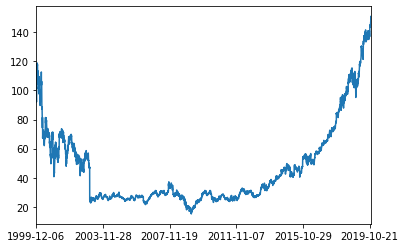

In [10]:
df.sort_index(inplace=True)
df[0].astype('float').plot()

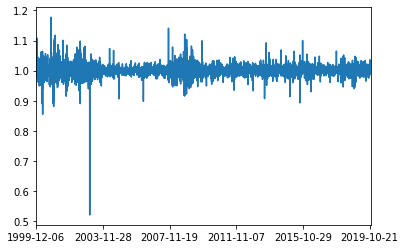

In [11]:
div.sort_index(inplace=True)
div.plot()

In [12]:
div.describe(percentiles=[.01,.1,.25,.5,.75,.9,.95,.99])

count    5023.000000
mean        1.000294
std         0.019655
min         0.521058
1%          0.951059
10%         0.981563
25%         0.991775
50%         1.000357
75%         1.008583
90%         1.019582
95%         1.027347
99%         1.053370
max         1.177592
Name: 0, dtype: float64

In [13]:
dateAnnotatedTwo = annotateBuyOrSellTwoClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedTwo, orient='index')
df[0].value_counts()

S    2567
B    2456
Name: 0, dtype: int64

In [14]:
dateAnnotatedEight = annotateBuyOrSellEightClasses(stockPrices)
df = pd.DataFrame.from_dict(dateAnnotatedEight, orient='index')
df[0].value_counts()

S0    835
B0    782
S2    641
S1    624
B2    612
B1    603
S3    467
B3    459
Name: 0, dtype: int64

In [15]:
normalizedIndicatorsTwo = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedTwo)
normalizedIndicatorsEight = getIndicatorsNormalizedAndAnnotaded(stockPrices, indicators, dateAnnotatedEight)

dataTwo = pd.DataFrame.from_dict(normalizedIndicatorsTwo, orient='index')
dataEight = pd.DataFrame.from_dict(normalizedIndicatorsEight, orient='index')

Normalizing and annotating indicators
Normalizing and annotating indicators


In [16]:
dataTwo = pd.DataFrame.merge(pd.DataFrame(dataTwo.indicators.values.tolist(), index=dataTwo.index), dataTwo, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])
dataEight = pd.DataFrame.merge(pd.DataFrame(dataEight.indicators.values.tolist(), index=dataEight.index), dataEight, left_index=True, right_index=True, how='outer').drop(columns=['indicators'])

In [17]:
dataTwo.head(), dataEight.head()

(                 SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135          B
 2019-11-20  0.980234  0.984143  0.988606          B
 2019-11-19  0.972594  0.976915  0.980575          S
 2019-11-18  0.973906  0.977031  0.980141          S
 2019-11-15  0.977842  0.979366  0.982223          S,
                  SMA       EMA       WMA annotation
 2019-11-21  0.989926  0.991931  0.997135         B1
 2019-11-20  0.980234  0.984143  0.988606         B0
 2019-11-19  0.972594  0.976915  0.980575         S1
 2019-11-18  0.973906  0.977031  0.980141         S1
 2019-11-15  0.977842  0.979366  0.982223         S2)

In [18]:
dataTwo.annotation = dataTwo.annotation.apply(lambda x: 0 if x == 'S' else 1)

eight_dict = {"B3":0, "B2": 1, "B1": 2, "B0": 3, "S0": 4, "S1": 5, "S2": 6, "S3": 7}
dataEight.annotation = dataEight.annotation.apply(lambda x: eight_dict[x])

In [19]:
dataTwo = dataTwo.sort_index()
dataEight = dataEight.sort_index()

In [20]:
import numpy as np
import matplotlib.pyplot as plt

n_steps = 4
n_indicators = 3

batch_size = 32
train_split = .8

X = {
    "mlp": {
        2 : [],
        8 : [] 
    },
    "lstm": {
        2 : [],
        8 : []
    }
}
y = {
    2 : [],
    8 : [] 
}

for i in range(len(dataTwo)):
    end_ix = i + n_steps
    if end_ix > len(dataTwo):
        break
    seq_x, seq_y = dataTwo.iloc[i:end_ix, :-1].values, dataTwo.iloc[end_ix-1, -1]
    X["lstm"][2].append(seq_x)
    X["mlp"][2].append(seq_x.flatten())
    y[2].append(seq_y)
    
for i in range(len(dataEight)):
    end_ix = i + n_steps
    if end_ix > len(dataEight):
        break
    seq_x, seq_y = dataEight.iloc[i:end_ix, :-1].values, dataEight.iloc[end_ix-1, -1]
    X["lstm"][8].append(seq_x)
    X["mlp"][8].append(seq_x.flatten())
    y[8].append(np.eye(8)[seq_y])

X["lstm"][2] = np.array(X["lstm"][2])
X["mlp"][2] = np.array(X["mlp"][2])
y[2] = np.array(y[2])

X["lstm"][8] = np.array(X["lstm"][8])
X["mlp"][8] = np.array(X["mlp"][8])
y[8] = np.array(y[8])

In [21]:
dataTwo.head()

,SMA,EMA,WMA,annotation
1999-12-07,0.971239,0.972042,0.982787,1
1999-12-08,0.992348,0.991003,1.002084,1
1999-12-09,1.007132,1.002554,1.013524,1
1999-12-10,0.994175,0.990011,0.999999,0
1999-12-13,0.995412,0.989802,0.999010,0


In [22]:
X["lstm"][2][0]

array([[0.97123905, 0.97204222, 0.98278734],
       [0.99234792, 0.99100349, 1.0020843 ],
       [1.00713152, 1.00255435, 1.01352391],
       [0.9941751 , 0.99001124, 0.99999893]])

In [23]:
X["mlp"][2][0]

array([0.97123905, 0.97204222, 0.98278734, 0.99234792, 0.99100349,
       1.0020843 , 1.00713152, 1.00255435, 1.01352391, 0.9941751 ,
       0.99001124, 0.99999893])

In [24]:
len(X["lstm"][2])

5020

In [25]:
from sklearn.model_selection import train_test_split

X_train = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][:int(len(X["lstm"][2]) * train_split)],
        8 : X["lstm"][8][:int(len(X["lstm"][8]) * train_split)]
    }
}

X_test = {
    "mlp": {
    },
    "lstm": {
        2 : X["lstm"][2][int(len(X["lstm"][2]) * train_split):],
        8 : X["lstm"][8][int(len(X["lstm"][8]) * train_split):]
    }
}

y_train = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][:int(len(y[2]) * train_split)],
        8 : y[8][:int(len(y[8]) * train_split)] 
    }
}

y_test = {
    "mlp": {
    },
    "lstm": {
        2 : y[2][int(len(y[2]) * train_split):],
        8 : y[8][int(len(y[2]) * train_split):] 
    }
}


X_train["mlp"][2], X_test["mlp"][2], y_train["mlp"][2], y_test["mlp"][2] = train_test_split(X["mlp"][2], y[2], train_size=train_split, random_state=0)
X_train["mlp"][8], X_test["mlp"][8], y_train["mlp"][8], y_test["mlp"][8] = train_test_split(X["mlp"][8], y[8], train_size=train_split, random_state=0)

In [26]:
MLP_2 = getModelMLP(n_steps, n_indicators, 1)
MLP_8 = getModelMLP(n_steps, n_indicators, 8)

LSTM_2 = getModelBidirectionalLSTM(n_steps, n_indicators, 1)
LSTM_8 = getModelBidirectionalLSTM(n_steps, n_indicators, 8)

In [27]:
MLP_2, LSTM_2, MLP_8, LSTM_8

(<keras.engine.sequential.Sequential at 0x13854a090>,
 <keras.engine.sequential.Sequential at 0x1388efd10>)

In [28]:
MLP_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
_________________________________________________________________


In [29]:
MLP_8.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                832       
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 520       
Total params: 5,512
Trainable params: 5,512
Non-trainable params: 0
_________________________________________________________________


In [30]:
LSTM_2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 128)               34816     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 34,945
Trainable params: 34,945
Non-trainable params: 0
_________________________________________________________________


In [31]:
LSTM_8.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 128)               34816     
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 1032      
Total params: 35,848
Trainable params: 35,848
Non-trainable params: 0
_________________________________________________________________


In [32]:
preds = {
    "mlp": {2: [], 8:[]},
    "lstm": {2: [], 8:[]}
}

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 1s 278us/step - loss: 0.7000 - accuracy: 0.5103 - val_loss: 0.6922 - val_accuracy: 0.5149
Epoch 2/300
3212/3212 [==============================] - 0s 88us/step - loss: 0.6991 - accuracy: 0.4894 - val_loss: 0.6918 - val_accuracy: 0.5149
Epoch 3/300
3212/3212 [==============================] - 0s 106us/step - loss: 0.6943 - accuracy: 0.5202 - val_loss: 0.6908 - val_accuracy: 0.5149
Epoch 4/300
3212/3212 [==============================] - 0s 94us/step - loss: 0.6941 - accuracy: 0.5106 - val_loss: 0.6904 - val_accuracy: 0.7886
Epoch 5/300
3212/3212 [==============================] - 0s 88us/step - loss: 0.6933 - accuracy: 0.5140 - val_loss: 0.6901 - val_accuracy: 0.5149
Epoch 6/300
3212/3212 [==============================] - 0s 82us/step - loss: 0.6909 - accuracy: 0.5224 - val_loss: 0.6899 - val_accuracy: 0.5149
Epoch 7/300
3212/3212 [==============================] - 0s 76us/step - los

3212/3212 [==============================] - 0s 85us/step - loss: 0.5940 - accuracy: 0.6572 - val_loss: 0.5101 - val_accuracy: 0.7848
Epoch 57/300
3212/3212 [==============================] - 0s 101us/step - loss: 0.6322 - accuracy: 0.6398 - val_loss: 0.5971 - val_accuracy: 0.6915
Epoch 58/300
3212/3212 [==============================] - 0s 89us/step - loss: 0.5860 - accuracy: 0.6787 - val_loss: 0.5557 - val_accuracy: 0.6891
Epoch 59/300
3212/3212 [==============================] - 0s 68us/step - loss: 0.5794 - accuracy: 0.6750 - val_loss: 0.5186 - val_accuracy: 0.7935
Epoch 60/300
3212/3212 [==============================] - 0s 78us/step - loss: 0.5703 - accuracy: 0.6790 - val_loss: 0.5138 - val_accuracy: 0.8060
Epoch 61/300
3212/3212 [==============================] - 0s 70us/step - loss: 0.5692 - accuracy: 0.6743 - val_loss: 0.5950 - val_accuracy: 0.6505
Epoch 62/300
3212/3212 [==============================] - 0s 68us/step - loss: 0.5390 - accuracy: 0.7101 - val_loss: 0.4731 - val_

Epoch 112/300
3212/3212 [==============================] - 0s 81us/step - loss: 0.4598 - accuracy: 0.7578 - val_loss: 0.4065 - val_accuracy: 0.8097
Epoch 113/300
3212/3212 [==============================] - 0s 76us/step - loss: 0.4422 - accuracy: 0.7758 - val_loss: 0.3281 - val_accuracy: 0.8993
Epoch 114/300
3212/3212 [==============================] - 0s 80us/step - loss: 0.4272 - accuracy: 0.7877 - val_loss: 0.2996 - val_accuracy: 0.8930
Epoch 115/300
3212/3212 [==============================] - 0s 77us/step - loss: 0.4449 - accuracy: 0.7886 - val_loss: 0.3235 - val_accuracy: 0.9005
Epoch 116/300
3212/3212 [==============================] - 0s 72us/step - loss: 0.4355 - accuracy: 0.7923 - val_loss: 0.5540 - val_accuracy: 0.6828
Epoch 117/300
3212/3212 [==============================] - 0s 68us/step - loss: 0.5115 - accuracy: 0.7357 - val_loss: 0.4006 - val_accuracy: 0.8321
Epoch 118/300
3212/3212 [==============================] - 0s 67us/step - loss: 0.4539 - accuracy: 0.7727 - val_

3212/3212 [==============================] - 0s 81us/step - loss: 0.4355 - accuracy: 0.7640 - val_loss: 0.2744 - val_accuracy: 0.9279
Epoch 168/300
3212/3212 [==============================] - 0s 68us/step - loss: 0.4341 - accuracy: 0.7855 - val_loss: 0.2933 - val_accuracy: 0.9478
Epoch 169/300
3212/3212 [==============================] - 0s 97us/step - loss: 0.4236 - accuracy: 0.7730 - val_loss: 0.3195 - val_accuracy: 0.9403
Epoch 170/300
3212/3212 [==============================] - 0s 80us/step - loss: 0.4451 - accuracy: 0.7593 - val_loss: 0.2860 - val_accuracy: 0.9639
Epoch 171/300
3212/3212 [==============================] - 0s 105us/step - loss: 0.4597 - accuracy: 0.7360 - val_loss: 0.5011 - val_accuracy: 0.6766
Epoch 172/300
3212/3212 [==============================] - 0s 147us/step - loss: 0.4303 - accuracy: 0.7590 - val_loss: 0.2937 - val_accuracy: 0.9080
Epoch 173/300
3212/3212 [==============================] - 0s 64us/step - loss: 0.4168 - accuracy: 0.7724 - val_loss: 0.4017

3212/3212 [==============================] - 0s 64us/step - loss: 0.5726 - accuracy: 0.7021 - val_loss: 0.4808 - val_accuracy: 0.8296
Epoch 223/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.5577 - accuracy: 0.7105 - val_loss: 0.4313 - val_accuracy: 0.8396
Epoch 224/300
3212/3212 [==============================] - 0s 60us/step - loss: 0.4425 - accuracy: 0.7603 - val_loss: 0.2655 - val_accuracy: 0.9515
Epoch 225/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.4142 - accuracy: 0.7559 - val_loss: 0.2978 - val_accuracy: 0.9328
Epoch 226/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.4239 - accuracy: 0.7693 - val_loss: 0.2101 - val_accuracy: 0.9490
Epoch 227/300
3212/3212 [==============================] - 0s 58us/step - loss: 0.3795 - accuracy: 0.7995 - val_loss: 0.2148 - val_accuracy: 0.9366
Epoch 228/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.4049 - accuracy: 0.7699 - val_loss: 0.2769 -

3212/3212 [==============================] - 0s 58us/step - loss: 0.4517 - accuracy: 0.7242 - val_loss: 0.2698 - val_accuracy: 0.8769
Epoch 278/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.4196 - accuracy: 0.7466 - val_loss: 0.2280 - val_accuracy: 0.9440
Epoch 279/300
3212/3212 [==============================] - 0s 59us/step - loss: 0.4440 - accuracy: 0.7653 - val_loss: 0.3214 - val_accuracy: 0.9030
Epoch 280/300
3212/3212 [==============================] - 0s 58us/step - loss: 0.4058 - accuracy: 0.7721 - val_loss: 0.2133 - val_accuracy: 0.9092
Epoch 281/300
3212/3212 [==============================] - 0s 58us/step - loss: 0.3770 - accuracy: 0.7870 - val_loss: 0.2449 - val_accuracy: 0.9117
Epoch 282/300
3212/3212 [==============================] - 0s 58us/step - loss: 0.4020 - accuracy: 0.7777 - val_loss: 0.2680 - val_accuracy: 0.9254
Epoch 283/300
3212/3212 [==============================] - 0s 60us/step - loss: 0.4049 - accuracy: 0.7715 - val_loss: 0.2053 -

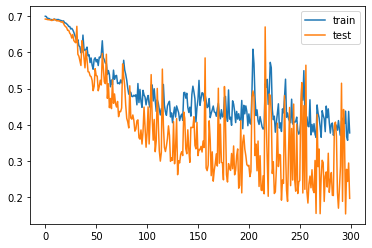

In [33]:
history_mlp_2 = MLP_2.fit(X_train["mlp"][2], y_train["mlp"][2], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_2.history['loss'], label='train')
plt.plot(history_mlp_2.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           S    0.92509   0.98406   0.95367       502
           B    0.98298   0.92032   0.95062       502

    accuracy                        0.95219      1004
   macro avg    0.95404   0.95219   0.95214      1004
weighted avg    0.95404   0.95219   0.95214      1004

Confusion matrix, without normalization
[[494   8]
 [ 40 462]]


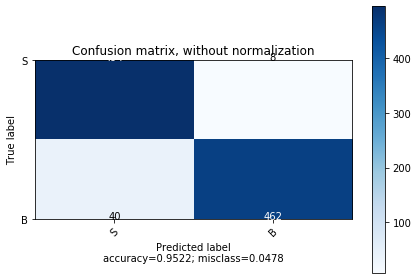

In [34]:
preds["mlp"][2] = MLP_2.predict(X_test["mlp"][2], batch_size=batch_size)
print(classification_report(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["mlp"][2], np.rint(preds["mlp"][2]).astype(np.int64), classes=np.array(["S","B"]))

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 0s 131us/step - loss: 2.0748 - accuracy: 0.1650 - val_loss: 2.0645 - val_accuracy: 0.1604
Epoch 2/300
3212/3212 [==============================] - 0s 59us/step - loss: 2.0634 - accuracy: 0.1691 - val_loss: 2.0626 - val_accuracy: 0.1604
Epoch 3/300
3212/3212 [==============================] - 0s 65us/step - loss: 2.0620 - accuracy: 0.1706 - val_loss: 2.0623 - val_accuracy: 0.1604
Epoch 4/300
3212/3212 [==============================] - 0s 58us/step - loss: 2.0612 - accuracy: 0.1700 - val_loss: 2.0627 - val_accuracy: 0.1604
Epoch 5/300
3212/3212 [==============================] - 0s 59us/step - loss: 2.0603 - accuracy: 0.1747 - val_loss: 2.0627 - val_accuracy: 0.1604
Epoch 6/300
3212/3212 [==============================] - 0s 62us/step - loss: 2.0602 - accuracy: 0.1731 - val_loss: 2.0615 - val_accuracy: 0.1604
Epoch 7/300
3212/3212 [==============================] - 0s 57us/step - loss

3212/3212 [==============================] - 0s 76us/step - loss: 1.8305 - accuracy: 0.2874 - val_loss: 1.7354 - val_accuracy: 0.3346
Epoch 57/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.8125 - accuracy: 0.2958 - val_loss: 1.7345 - val_accuracy: 0.3383
Epoch 58/300
3212/3212 [==============================] - 0s 62us/step - loss: 1.7901 - accuracy: 0.3132 - val_loss: 1.6821 - val_accuracy: 0.4565
Epoch 59/300
3212/3212 [==============================] - 0s 67us/step - loss: 1.8010 - accuracy: 0.3007 - val_loss: 1.6710 - val_accuracy: 0.4764
Epoch 60/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.7843 - accuracy: 0.3032 - val_loss: 1.6644 - val_accuracy: 0.4726
Epoch 61/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.7776 - accuracy: 0.3039 - val_loss: 1.6872 - val_accuracy: 0.3396
Epoch 62/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.7951 - accuracy: 0.2914 - val_loss: 1.6467 - val_a

Epoch 112/300
3212/3212 [==============================] - 0s 80us/step - loss: 1.6358 - accuracy: 0.3649 - val_loss: 1.3593 - val_accuracy: 0.5933
Epoch 113/300
3212/3212 [==============================] - 0s 96us/step - loss: 1.6059 - accuracy: 0.3861 - val_loss: 1.4024 - val_accuracy: 0.4813
Epoch 114/300
3212/3212 [==============================] - 0s 67us/step - loss: 1.6147 - accuracy: 0.3885 - val_loss: 1.3617 - val_accuracy: 0.5958
Epoch 115/300
3212/3212 [==============================] - 0s 85us/step - loss: 1.6167 - accuracy: 0.3801 - val_loss: 1.3322 - val_accuracy: 0.5473
Epoch 116/300
3212/3212 [==============================] - 0s 79us/step - loss: 1.6180 - accuracy: 0.3804 - val_loss: 1.3360 - val_accuracy: 0.6144
Epoch 117/300
3212/3212 [==============================] - 0s 77us/step - loss: 1.5903 - accuracy: 0.3895 - val_loss: 1.3593 - val_accuracy: 0.5858
Epoch 118/300
3212/3212 [==============================] - 0s 97us/step - loss: 1.5965 - accuracy: 0.3804 - val_

3212/3212 [==============================] - 0s 57us/step - loss: 1.5566 - accuracy: 0.3826 - val_loss: 1.5644 - val_accuracy: 0.2985
Epoch 168/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5676 - accuracy: 0.3808 - val_loss: 1.2127 - val_accuracy: 0.6219
Epoch 169/300
3212/3212 [==============================] - 0s 58us/step - loss: 1.5655 - accuracy: 0.3873 - val_loss: 1.2291 - val_accuracy: 0.6157
Epoch 170/300
3212/3212 [==============================] - 0s 56us/step - loss: 1.5313 - accuracy: 0.4166 - val_loss: 1.2423 - val_accuracy: 0.5609
Epoch 171/300
3212/3212 [==============================] - 0s 61us/step - loss: 1.5669 - accuracy: 0.3926 - val_loss: 1.2872 - val_accuracy: 0.5361
Epoch 172/300
3212/3212 [==============================] - 0s 60us/step - loss: 1.5457 - accuracy: 0.4141 - val_loss: 1.2677 - val_accuracy: 0.5473
Epoch 173/300
3212/3212 [==============================] - 0s 58us/step - loss: 1.5330 - accuracy: 0.3991 - val_loss: 1.2571 -

3212/3212 [==============================] - 0s 63us/step - loss: 1.5138 - accuracy: 0.4159 - val_loss: 1.2212 - val_accuracy: 0.6281
Epoch 223/300
3212/3212 [==============================] - 0s 58us/step - loss: 1.4785 - accuracy: 0.4408 - val_loss: 1.2181 - val_accuracy: 0.5858
Epoch 224/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5088 - accuracy: 0.4116 - val_loss: 1.2169 - val_accuracy: 0.5697
Epoch 225/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5034 - accuracy: 0.4290 - val_loss: 1.2064 - val_accuracy: 0.5858
Epoch 226/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5242 - accuracy: 0.4063 - val_loss: 1.2637 - val_accuracy: 0.4813
Epoch 227/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5096 - accuracy: 0.4234 - val_loss: 1.1962 - val_accuracy: 0.6082
Epoch 228/300
3212/3212 [==============================] - 0s 57us/step - loss: 1.5195 - accuracy: 0.4088 - val_loss: 1.2295 -

3212/3212 [==============================] - 0s 65us/step - loss: 1.4706 - accuracy: 0.4340 - val_loss: 1.2610 - val_accuracy: 0.4975
Epoch 278/300
3212/3212 [==============================] - 0s 65us/step - loss: 1.4773 - accuracy: 0.4328 - val_loss: 1.1522 - val_accuracy: 0.6219
Epoch 279/300
3212/3212 [==============================] - 0s 71us/step - loss: 1.4755 - accuracy: 0.4402 - val_loss: 1.1685 - val_accuracy: 0.4938
Epoch 280/300
3212/3212 [==============================] - 0s 66us/step - loss: 1.4479 - accuracy: 0.4421 - val_loss: 1.1740 - val_accuracy: 0.5174
Epoch 281/300
3212/3212 [==============================] - 0s 110us/step - loss: 1.4611 - accuracy: 0.4281 - val_loss: 1.3752 - val_accuracy: 0.3358
Epoch 282/300
3212/3212 [==============================] - 1s 160us/step - loss: 1.4946 - accuracy: 0.4293 - val_loss: 1.0864 - val_accuracy: 0.5958
Epoch 283/300
3212/3212 [==============================] - 0s 126us/step - loss: 1.4789 - accuracy: 0.4253 - val_loss: 1.481

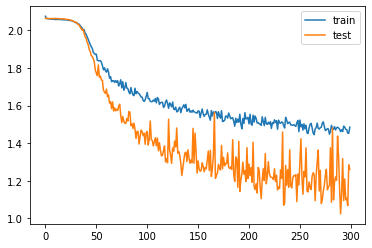

In [35]:
history_mlp_8 = MLP_8.fit(X_train["mlp"][8], y_train["mlp"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_mlp_8.history['loss'], label='train')
plt.plot(history_mlp_8.history['val_loss'], label='test')
plt.legend()
plt.show()

In [132]:
# Calculando lucro/prejuízo total, supondo que inicialmente temos US$1000 em carteira
import copy

classificationArray = list(np.argmax(preds["lstm"][8], axis=1))

prices = copy.deepcopy(stockPrices)

for date in sorted(stockPrices.keys()):
    if len(prices) == len(classificationArray):
        break
    del prices[date]

initialMoney = 1000.00
index = 0
currentMoney = initialMoney
currentStocks = 0.0

for date in sorted(prices.keys()):
    stockPrice = float(prices[date])
    classification = classificationArray[index]
    # Caso de compra
    if currentMoney != 0 and (classification == 0 or classification == 1 or classification == 2 or classification == 3):
        currentStocks = currentMoney/stockPrice
        currentMoney = 0.0
    elif currentStocks != 0 and (classification == 4 or classification == 5 or classification == 6 or classification == 7):
        currentMoney = currentStocks*stockPrice
        currentStocks = 0.0
    index += 1
    
if currentMoney == 0:
    lastPrice = float(prices[sorted(prices.keys())[-1]])
    finalMoney = currentStocks*lastPrice

growthPercentage = 100.0*((finalMoney-initialMoney)/initialMoney)
timeLenInYears = len(prices)/252.0

print("Current money:\t   US$ " + str(round(currentMoney, 2)))
print("Current stocks:\t   " + str(round(currentStocks, 2)) + "\t| Last stock-price: US$ " + str(round(lastPrice, 2)))
print("First date:\t   " + sorted(prices.keys())[1] + "\t| Initial money:    US$ " + str(round(initialMoney, 2)))
print("Last date:\t   " + sorted(prices.keys())[-1] + "\t| Final money:\t    US$ " + str(round(finalMoney, 2)))
print("Final profit:\t   US$ " + str(round(finalMoney-initialMoney, 2)) + " over " + str(round(timeLenInYears, 2)) + " years")
print("Growth percentage: " + str(round(growthPercentage, 2)) + "%")
print("Growth per year:   US$ " + str(round((finalMoney-initialMoney)/timeLenInYears, 2)))

Current money:	   US$ 0.0
Current stocks:	   21.33	| Last stock-price: US$ 150.88
First date:	   2015-11-25	| Initial money:    US$ 1000.0
Last date:	   2019-11-19	| Final money:	    US$ 3218.78
Final profit:	   US$ 2218.78 over 3.98 years
Growth percentage: 221.88%
Growth per year:   US$ 556.9


/Users/rodrigohilkner/opt/anaconda3/envs/pfg/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rodrigohilkner/opt/anaconda3/envs/pfg/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          B3    1.00000   0.17391   0.29630        92
          B2    0.00000   0.00000   0.00000       120
          B1    0.00000   0.00000   0.00000       136
          B0    0.00000   0.00000   0.00000       154
          S0    0.00000   0.00000   0.00000       149
          S1    0.00000   0.00000   0.00000       134
          S2    0.00000   0.00000   0.00000       130
          S3    1.00000   0.24719   0.39640        89

   micro avg    0.97436   0.03785   0.07287      1004
   macro avg    0.25000   0.05264   0.08659      1004
weighted avg    0.18028   0.03785   0.06229      1004
 samples avg    0.03785   0.03785   0.03785      1004

Confusion matrix, without normalization
[[ 92   0   0   0   0   0   0   0]
 [120   0   0   0   0   0   0   0]
 [135   0   0   0   1   0   0   0]
 [154   0   0   0   0   0   0   0]
 [149   0   0   0   0   0   0   0]
 [134   0   0   0   0   0   0   0]
 [130   0   0   0   0   0   0   0]
 [ 67   0 

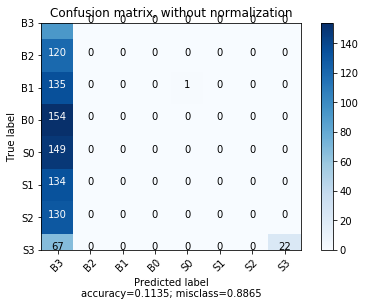

In [36]:
preds["mlp"][8] = MLP_8.predict(X_test["mlp"][8], batch_size=batch_size)
print(classification_report(y_test["mlp"][8], np.rint(preds["mlp"][8]), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["mlp"][8].argmax(axis=1), np.rint(preds["mlp"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))

Train on 3212 samples, validate on 804 samples
Epoch 1/200
3212/3212 [==============================] - 2s 547us/step - loss: 0.6947 - accuracy: 0.4860 - val_loss: 0.6929 - val_accuracy: 0.5149
Epoch 2/200
3212/3212 [==============================] - 1s 228us/step - loss: 0.6934 - accuracy: 0.5068 - val_loss: 0.6928 - val_accuracy: 0.5149
Epoch 3/200
3212/3212 [==============================] - 1s 254us/step - loss: 0.6934 - accuracy: 0.4975 - val_loss: 0.6940 - val_accuracy: 0.4851
Epoch 4/200
3212/3212 [==============================] - 1s 253us/step - loss: 0.6930 - accuracy: 0.4969 - val_loss: 0.6932 - val_accuracy: 0.4851
Epoch 5/200
3212/3212 [==============================] - 1s 228us/step - loss: 0.6928 - accuracy: 0.5286 - val_loss: 0.6929 - val_accuracy: 0.4863
Epoch 6/200
3212/3212 [==============================] - 1s 224us/step - loss: 0.6928 - accuracy: 0.5037 - val_loss: 0.6942 - val_accuracy: 0.4851
Epoch 7/200
3212/3212 [==============================] - 1s 230us/step 

3212/3212 [==============================] - 1s 246us/step - loss: 0.3418 - accuracy: 0.8518 - val_loss: 0.3256 - val_accuracy: 0.9602
Epoch 57/200
3212/3212 [==============================] - 2s 582us/step - loss: 0.3455 - accuracy: 0.8465 - val_loss: 0.3398 - val_accuracy: 0.8943
Epoch 58/200
3212/3212 [==============================] - 1s 201us/step - loss: 0.3459 - accuracy: 0.8555 - val_loss: 0.3547 - val_accuracy: 0.8495
Epoch 59/200
3212/3212 [==============================] - 1s 193us/step - loss: 0.3299 - accuracy: 0.8833 - val_loss: 0.3817 - val_accuracy: 0.7960
Epoch 60/200
3212/3212 [==============================] - 1s 193us/step - loss: 0.3962 - accuracy: 0.8188 - val_loss: 0.3686 - val_accuracy: 0.8358
Epoch 61/200
3212/3212 [==============================] - 1s 198us/step - loss: 0.3681 - accuracy: 0.8394 - val_loss: 0.9230 - val_accuracy: 0.5498
Epoch 62/200
3212/3212 [==============================] - 1s 196us/step - loss: 0.3518 - accuracy: 0.8745 - val_loss: 0.3278 

3212/3212 [==============================] - 1s 199us/step - loss: 0.2854 - accuracy: 0.8842 - val_loss: 0.2556 - val_accuracy: 0.9142
Epoch 112/200
3212/3212 [==============================] - 1s 203us/step - loss: 0.2604 - accuracy: 0.8870 - val_loss: 0.3140 - val_accuracy: 0.8197
Epoch 113/200
3212/3212 [==============================] - 1s 205us/step - loss: 0.2485 - accuracy: 0.9016 - val_loss: 0.2423 - val_accuracy: 0.9291
Epoch 114/200
3212/3212 [==============================] - 1s 203us/step - loss: 0.2346 - accuracy: 0.9153 - val_loss: 0.2388 - val_accuracy: 0.9266
Epoch 115/200
3212/3212 [==============================] - 1s 209us/step - loss: 0.2733 - accuracy: 0.8851 - val_loss: 0.2356 - val_accuracy: 0.9590
Epoch 116/200
3212/3212 [==============================] - 1s 214us/step - loss: 0.2822 - accuracy: 0.8742 - val_loss: 0.2865 - val_accuracy: 0.8470
Epoch 117/200
3212/3212 [==============================] - 1s 224us/step - loss: 0.2786 - accuracy: 0.8764 - val_loss: 0

3212/3212 [==============================] - 1s 384us/step - loss: 0.2678 - accuracy: 0.8829 - val_loss: 0.2116 - val_accuracy: 0.9565
Epoch 167/200
3212/3212 [==============================] - 1s 357us/step - loss: 0.2347 - accuracy: 0.8976 - val_loss: 0.2619 - val_accuracy: 0.8731
Epoch 168/200
3212/3212 [==============================] - 1s 375us/step - loss: 0.2421 - accuracy: 0.8935 - val_loss: 0.2074 - val_accuracy: 0.9813
Epoch 169/200
3212/3212 [==============================] - 1s 373us/step - loss: 0.2348 - accuracy: 0.9069 - val_loss: 0.2623 - val_accuracy: 0.8694
Epoch 170/200
3212/3212 [==============================] - 1s 359us/step - loss: 0.2875 - accuracy: 0.8705 - val_loss: 0.2177 - val_accuracy: 0.9602
Epoch 171/200
3212/3212 [==============================] - 1s 231us/step - loss: 0.2143 - accuracy: 0.9284 - val_loss: 0.2171 - val_accuracy: 0.9428
Epoch 172/200
3212/3212 [==============================] - 1s 223us/step - loss: 0.2062 - accuracy: 0.9315 - val_loss: 0

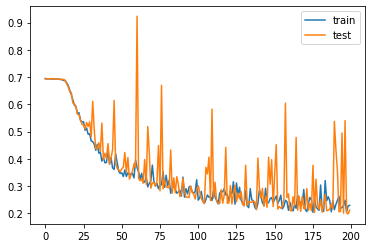

In [37]:
history_lstm_2 = LSTM_2.fit(X_train["lstm"][2], y_train["lstm"][2], epochs=200, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_2.history['loss'], label='train')
plt.plot(history_lstm_2.history['val_loss'], label='test')
plt.legend()
plt.show()

              precision    recall  f1-score   support

           S    0.88924   1.00000   0.94137       562
           B    1.00000   0.84163   0.91400       442

    accuracy                        0.93028      1004
   macro avg    0.94462   0.92081   0.92769      1004
weighted avg    0.93800   0.93028   0.92932      1004

Confusion matrix, without normalization
[[562   0]
 [ 70 372]]


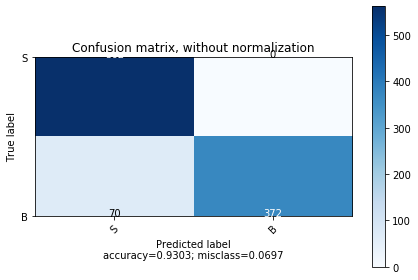

In [38]:
preds["lstm"][2] = LSTM_2.predict(X_test["lstm"][2], batch_size=batch_size)
print(classification_report(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), target_names=["S","B"], digits=5))
conf = plot_confusion_matrix(y_test["lstm"][2], np.rint(preds["lstm"][2]).astype(np.int64), classes=np.array(["S","B"]))

Train on 3212 samples, validate on 804 samples
Epoch 1/300
3212/3212 [==============================] - 2s 557us/step - loss: 2.0797 - accuracy: 0.1410 - val_loss: 2.0603 - val_accuracy: 0.1667
Epoch 2/300
3212/3212 [==============================] - 1s 313us/step - loss: 2.0745 - accuracy: 0.1519 - val_loss: 2.0643 - val_accuracy: 0.1642
Epoch 3/300
3212/3212 [==============================] - 1s 264us/step - loss: 2.0739 - accuracy: 0.1451 - val_loss: 2.0616 - val_accuracy: 0.1642
Epoch 4/300
3212/3212 [==============================] - 1s 218us/step - loss: 2.0740 - accuracy: 0.1504 - val_loss: 2.0610 - val_accuracy: 0.1642
Epoch 5/300
3212/3212 [==============================] - 1s 247us/step - loss: 2.0737 - accuracy: 0.1491 - val_loss: 2.0623 - val_accuracy: 0.1642
Epoch 6/300
3212/3212 [==============================] - 1s 243us/step - loss: 2.0737 - accuracy: 0.1504 - val_loss: 2.0628 - val_accuracy: 0.1642
Epoch 7/300
3212/3212 [==============================] - 1s 245us/step 

3212/3212 [==============================] - 1s 214us/step - loss: 2.0591 - accuracy: 0.1519 - val_loss: 2.0468 - val_accuracy: 0.1642
Epoch 57/300
3212/3212 [==============================] - 1s 211us/step - loss: 2.0579 - accuracy: 0.1538 - val_loss: 2.0526 - val_accuracy: 0.1679
Epoch 58/300
3212/3212 [==============================] - 1s 210us/step - loss: 2.0528 - accuracy: 0.1687 - val_loss: 2.0442 - val_accuracy: 0.2077
Epoch 59/300
3212/3212 [==============================] - 1s 219us/step - loss: 2.0517 - accuracy: 0.1653 - val_loss: 2.0450 - val_accuracy: 0.1704
Epoch 60/300
3212/3212 [==============================] - 1s 216us/step - loss: 2.0470 - accuracy: 0.1634 - val_loss: 2.0537 - val_accuracy: 0.1978
Epoch 61/300
3212/3212 [==============================] - 1s 218us/step - loss: 2.0401 - accuracy: 0.1747 - val_loss: 2.0351 - val_accuracy: 0.1729
Epoch 62/300
3212/3212 [==============================] - 1s 216us/step - loss: 2.0317 - accuracy: 0.1691 - val_loss: 2.0317 

3212/3212 [==============================] - 1s 250us/step - loss: 1.2843 - accuracy: 0.5109 - val_loss: 1.4049 - val_accuracy: 0.4440
Epoch 112/300
3212/3212 [==============================] - 1s 330us/step - loss: 1.3104 - accuracy: 0.4866 - val_loss: 1.7259 - val_accuracy: 0.1132
Epoch 113/300
3212/3212 [==============================] - 1s 352us/step - loss: 1.3358 - accuracy: 0.4639 - val_loss: 1.4431 - val_accuracy: 0.4303
Epoch 114/300
3212/3212 [==============================] - 1s 258us/step - loss: 1.3344 - accuracy: 0.4533 - val_loss: 1.4482 - val_accuracy: 0.3930
Epoch 115/300
3212/3212 [==============================] - 1s 339us/step - loss: 1.2728 - accuracy: 0.5109 - val_loss: 1.5011 - val_accuracy: 0.3085
Epoch 116/300
3212/3212 [==============================] - 1s 287us/step - loss: 1.2858 - accuracy: 0.4947 - val_loss: 1.3502 - val_accuracy: 0.6157
Epoch 117/300
3212/3212 [==============================] - 1s 292us/step - loss: 1.2761 - accuracy: 0.4994 - val_loss: 1

3212/3212 [==============================] - 1s 226us/step - loss: 1.1088 - accuracy: 0.5741 - val_loss: 1.2001 - val_accuracy: 0.4714
Epoch 167/300
3212/3212 [==============================] - 1s 216us/step - loss: 1.1258 - accuracy: 0.5467 - val_loss: 1.4274 - val_accuracy: 0.2139
Epoch 168/300
3212/3212 [==============================] - 1s 214us/step - loss: 1.1760 - accuracy: 0.4897 - val_loss: 1.3536 - val_accuracy: 0.2127
Epoch 169/300
3212/3212 [==============================] - 1s 208us/step - loss: 1.1160 - accuracy: 0.5620 - val_loss: 1.5643 - val_accuracy: 0.1480
Epoch 170/300
3212/3212 [==============================] - 1s 212us/step - loss: 1.1236 - accuracy: 0.5414 - val_loss: 1.2317 - val_accuracy: 0.4552
Epoch 171/300
3212/3212 [==============================] - 1s 220us/step - loss: 1.1194 - accuracy: 0.5492 - val_loss: 1.3226 - val_accuracy: 0.3781
Epoch 172/300
3212/3212 [==============================] - 1s 213us/step - loss: 1.0966 - accuracy: 0.5704 - val_loss: 1

3212/3212 [==============================] - 1s 222us/step - loss: 1.0432 - accuracy: 0.5757 - val_loss: 1.0872 - val_accuracy: 0.6020
Epoch 222/300
3212/3212 [==============================] - 1s 221us/step - loss: 1.0832 - accuracy: 0.5442 - val_loss: 1.3139 - val_accuracy: 0.3470
Epoch 223/300
3212/3212 [==============================] - 1s 228us/step - loss: 1.0175 - accuracy: 0.6027 - val_loss: 1.1954 - val_accuracy: 0.4216
Epoch 224/300
3212/3212 [==============================] - 1s 226us/step - loss: 1.0635 - accuracy: 0.5532 - val_loss: 1.0725 - val_accuracy: 0.6779
Epoch 225/300
3212/3212 [==============================] - 1s 228us/step - loss: 1.0212 - accuracy: 0.5928 - val_loss: 1.0923 - val_accuracy: 0.5585
Epoch 226/300
3212/3212 [==============================] - 1s 226us/step - loss: 1.0396 - accuracy: 0.5785 - val_loss: 1.1037 - val_accuracy: 0.6144
Epoch 227/300
3212/3212 [==============================] - 1s 226us/step - loss: 1.0343 - accuracy: 0.5744 - val_loss: 1

3212/3212 [==============================] - 1s 215us/step - loss: 1.0308 - accuracy: 0.5405 - val_loss: 0.9992 - val_accuracy: 0.7090
Epoch 277/300
3212/3212 [==============================] - 1s 217us/step - loss: 1.0294 - accuracy: 0.5592 - val_loss: 1.1390 - val_accuracy: 0.4602
Epoch 278/300
3212/3212 [==============================] - 1s 215us/step - loss: 0.9633 - accuracy: 0.6183 - val_loss: 1.0524 - val_accuracy: 0.5672
Epoch 279/300
3212/3212 [==============================] - 1s 220us/step - loss: 1.0071 - accuracy: 0.5822 - val_loss: 1.1219 - val_accuracy: 0.4851
Epoch 280/300
3212/3212 [==============================] - 1s 218us/step - loss: 0.9641 - accuracy: 0.6127 - val_loss: 1.1905 - val_accuracy: 0.4502
Epoch 281/300
3212/3212 [==============================] - 1s 222us/step - loss: 1.0017 - accuracy: 0.5744 - val_loss: 1.0065 - val_accuracy: 0.6455
Epoch 282/300
3212/3212 [==============================] - 1s 308us/step - loss: 1.0066 - accuracy: 0.5735 - val_loss: 1

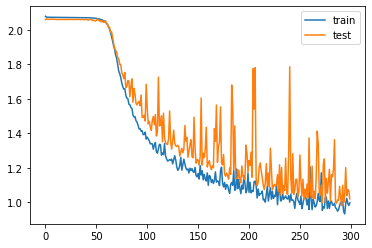

In [39]:
history_lstm_8 = LSTM_8.fit(X_train["lstm"][8], y_train["lstm"][8], epochs=300, verbose=1, validation_split=.2, batch_size=batch_size)
plt.plot(history_lstm_8.history['loss'], label='train')
plt.plot(history_lstm_8.history['val_loss'], label='test')
plt.legend()
plt.show()

/Users/rodrigohilkner/opt/anaconda3/envs/pfg/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rodrigohilkner/opt/anaconda3/envs/pfg/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          B3    0.77273   1.00000   0.87179        51
          B2    0.00000   0.00000   0.00000        98
          B1    0.00000   0.00000   0.00000       119
          B0    0.00000   0.00000   0.00000       174
          S0    0.00000   0.00000   0.00000       220
          S1    0.00000   0.00000   0.00000       136
          S2    0.00000   0.00000   0.00000       148
          S3    0.95000   0.98276   0.96610        58

   micro avg    0.85714   0.10757   0.19115      1004
   macro avg    0.21534   0.24784   0.22974      1004
weighted avg    0.09413   0.10757   0.10010      1004
 samples avg    0.10757   0.10757   0.10757      1004

Confusion matrix, without normalization
[[ 51   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0]
 [119   0   0   0   0   0   0   0]
 [174   0   0   0   0   0   0   0]
 [220   0   0   0   0   0   0   0]
 [136   0   0   0   0   0   0   0]
 [145   0   0   0   0   0   0   3]
 [  1   0 

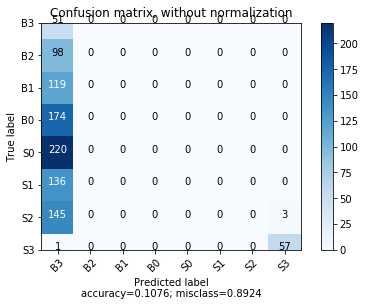

In [40]:
preds["lstm"][8] = LSTM_8.predict(X_test["lstm"][8], batch_size=batch_size)
print(classification_report(y_test["lstm"][8], np.rint(preds["lstm"][8]).astype(np.int64), target_names=eight_dict.keys(), digits=5))
conf = plot_confusion_matrix(y_test["lstm"][8].argmax(axis=1), np.rint(preds["lstm"][8]).argmax(axis=1), classes=np.array(list(eight_dict.keys())))